In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Titanic survived Project
#### Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

##### Attribute Information
Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Observation of the RAW Data Avaiable
The Dataset contains the details of Passengers in which both Numerical and Categorical Data are present. "Survived" is the Target variable which contains 2 Categories, hence this can be termed as 'Classification Problem'; where Survived predictions will be done by using Classification Models.

In [111]:
df['Survived'].unique() #Target Variable

array([0, 1], dtype=int64)

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [114]:
df.shape

(891, 12)

The Dataset contains 891 Rows and 12 Columns.

# Data Preprocessing

### Data Cleaning

In [115]:
# Drop PassengerID Column as it has all unique Values and it will have no impact on the dataset for further processing.
df.drop('PassengerId', axis = 1, inplace = True)
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

There are Three(03) different datatypes as int64, float64 and object available in the dataset.

In [116]:
# Check number of Unique Values from each Column.
df.nunique().to_frame('No. of Unique Values')

,No. of Unique Values
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [117]:
# Check Columns with count of unique records

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      

In [118]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Dataset have Null Values in Age Column(177 Nos.), Cabin Columns(687 Nos.) and Embarked Column(02 Nos.)

###### Eliminate Nulls from Age Column

In [119]:
age_null = df[df['Age'].isna()]
age_null

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [120]:
# Statistical summary of columns with Numerical Data
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
#Fill nulls in Age Column. as it is continuous data the nulls can be replaced with mean value

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [122]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### Eliminate Nulls from Cabin Column

In [123]:
#Check Columns with Null

cabin_null = df[df['Cabin'].isna()]
cabin_null

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


Out of 891 Rows, 687 Rows have Null value. i.e Data is availble in 204 Rows Only.

In [124]:
# Lets check the Cabin details not available for 1st Class Passengers.
cabin_null_1st = df[df['Cabin'].isna() & df['Pclass'].isin([1])]
cabin_null_1st.count()

Survived    40
Pclass      40
Name        40
Sex         40
Age         40
SibSp       40
Parch       40
Ticket      40
Fare        40
Cabin        0
Embarked    40
dtype: int64

40 Nos. 1st Class Passengers donot have the Cabin Data.

In [125]:
# Lets check the Cabin details for 2nd and 3rd Class Passengers.
cabin_2nd_3rd = df[df['Cabin'].notnull() & df['Pclass'].isin([2, 3])]
cabin_2nd_3rd.count()

Survived    28
Pclass      28
Name        28
Sex         28
Age         28
SibSp       28
Parch       28
Ticket      28
Fare        28
Cabin       28
Embarked    28
dtype: int64

28 Nos. Passengers having Cabin Details are from 2nd & 3rd Class Category.

Any Data will not be justified to be replaced with NaN of Cabin Column.

Remove Cabin Column.

In [126]:
df = df.drop('Cabin', axis = 1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


###### Eliminate Nulls from Embarked Column

In [127]:
emb_null = df[df['Embarked'].isna()]
emb_null

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


2 Rows to be deleted as the data cannot be judge and assigned to NaN values of Embarked Column.

In [128]:
df = df.drop(df.index[df['Embarked'].isna()])

In [129]:
df.reset_index()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
885,887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
886,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
887,889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [130]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [131]:
# again Cross Check the Nulls in Dataset

df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

All Nulls have been countered

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [134]:
# Replace 0 & 1 respectively with No & Yes from Survived Column.

df['Survived'].replace({0:'No', 1:'Yes'}, inplace=True)

In [136]:
# Replace 1, 2 & 3 respectively with 1st, 2nd & 3rd from Pclass Column.

df['Pclass'].replace({1:'1st', 2:'2nd',3:'3rd'}, inplace=True)

In [137]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,3rd,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,Yes,3rd,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,No,3rd,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,No,2nd,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,Yes,1st,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,No,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,Yes,1st,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [147]:
# Drop Name Column as it has all unique Values and it will have no impact on the dataset for further processing.
df.drop('Name', axis = 1, inplace = True)
df.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    object 
 1   Pclass    889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 69.5+ KB


In [149]:
df.describe()

,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,29.653446,0.524184,0.382452,32.096681
std,12.968366,1.103705,0.806761,49.697504
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Summary shows no negative/invalid values.

Observations based on Statistical Data :

1) Counts of all column are same (889), which means there are no missing values in dataset.

2) The mean value is greater than the median(50%) in SibSp, Parch and Fare column, hence data is skewed towards Right.

3) The mean value is less than the median(50%) in Age column, hence data is skewed towards Left.

4) There is hue difference between 75% and max values of MonthlyCharges column and TotalCharges column hence outliers are present in data.

In [150]:
# Split the columns into Categorical Column and Numerical Column.
cat_col = []
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else :
        num_col.append(i)
        
print('Categorical Columns : ', cat_col)
print('Numerical Columns : ', num_col)

Categorical Columns :  ['Survived', 'Pclass', 'Sex', 'Ticket', 'Embarked']
Numerical Columns :  ['Age', 'SibSp', 'Parch', 'Fare']


### Data Visualization

##### Univariate Analysis

No     549
Yes    340
Name: Survived, dtype: int64


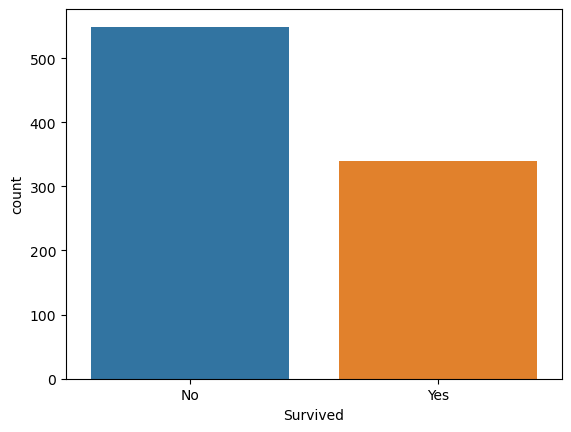

In [151]:
# Visialise the number of Passengers Survived.
ax = sns.countplot(x='Survived', data=df)

print(df['Survived'].value_counts())

Almost 38% people have survived, i.e. there are more Passengers that were not Survived. Hence there is Class Imbalance issue in Data.

3rd    491
1st    214
2nd    184
Name: Pclass, dtype: int64


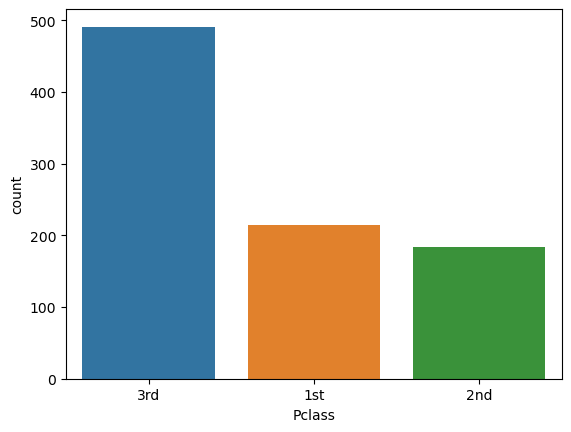

In [153]:
# Visualizing the count of Passengers based on Pclass.

ax = sns.countplot(x='Pclass', data=df)

print(df['Pclass'].value_counts())

More than 50 % passengers were from 3rd Class, while 1st Class and 2nd Class passenegers were nearly 200.

male      577
female    312
Name: Sex, dtype: int64


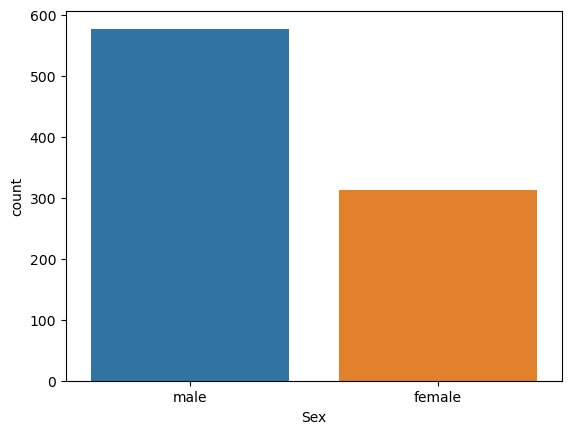

In [154]:
# Visualizing the count of Passengers based on Sex.

ax = sns.countplot(x='Sex', data=df)

print(df['Sex'].value_counts())

Male passengers were nearly double than Female Passengers

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64


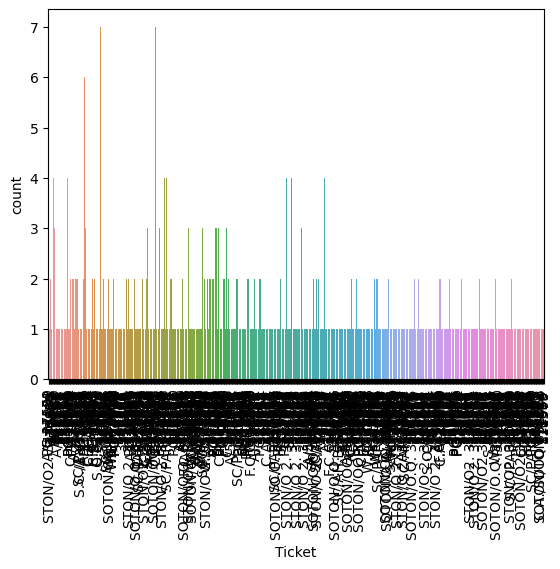

In [157]:
# Visualizing the count of Passengers based on Ticket.

ax = sns.countplot(x='Ticket', data=df)
plt.xticks(rotation=90)

print(df['Ticket'].value_counts())

Majority of Passengers were Travelling alone.

For Balance, Passengers probably travelling as family and count is as 02 Passengers more than 30, 03 Passengers - 8 Nos., 04 Passengers - 07 Nos., 07 Passengers - 02 Nos., 06 Passengers one Family.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


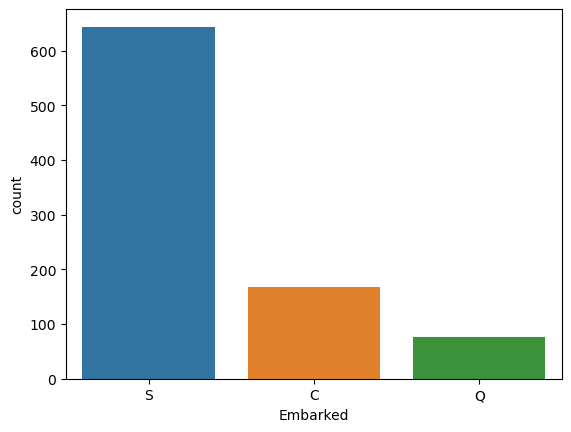

In [158]:
# Visualizing the count of Passengers based on Embarked.

ax = sns.countplot(x='Embarked', data=df)

print(df['Embarked'].value_counts())

644 passengers were from S (Southampton) while 168 Passengers were from C (Cherbourg) and balance 77 were from Q (Queenstown)

In [159]:
num_col

['Age', 'SibSp', 'Parch', 'Fare']

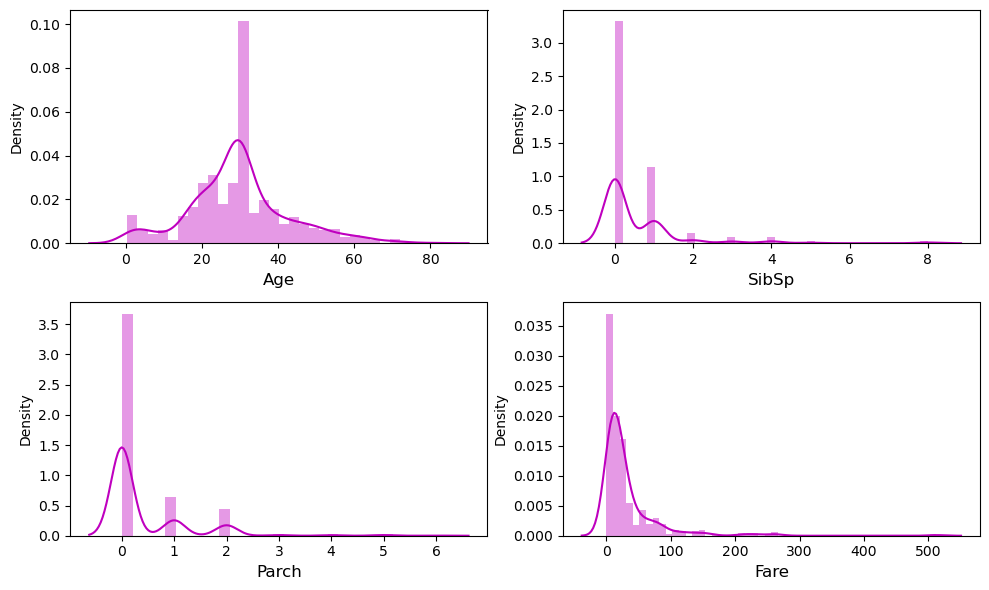

In [160]:
# lets check how the data is distributed for other services.
plt.figure(figsize=(10,6), facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber <= 4 :
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(df[col], color ='m')
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Obervations Based on distribution plots:

1) Data is normal and dont have skewness for Age Column.

2) The data in SibSp, Parch and Fare column is Skewed to Right.

###  Bivariate Analysis

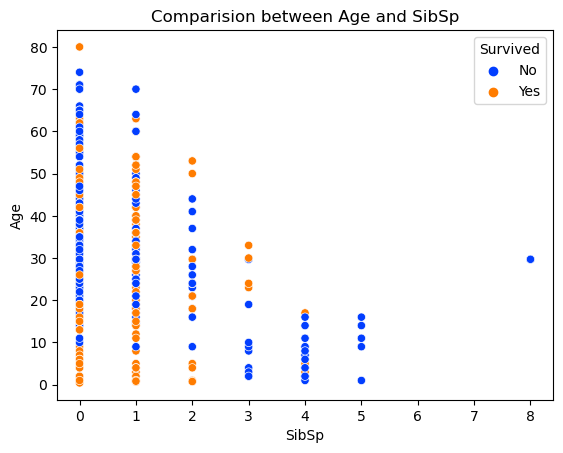

In [162]:
# Compare Age with SibSp
plt.title('Comparision between Age and SibSp')
sns.scatterplot(x = 'SibSp', y = 'Age', data = df, hue = 'Survived', palette = 'bright')
plt.show()

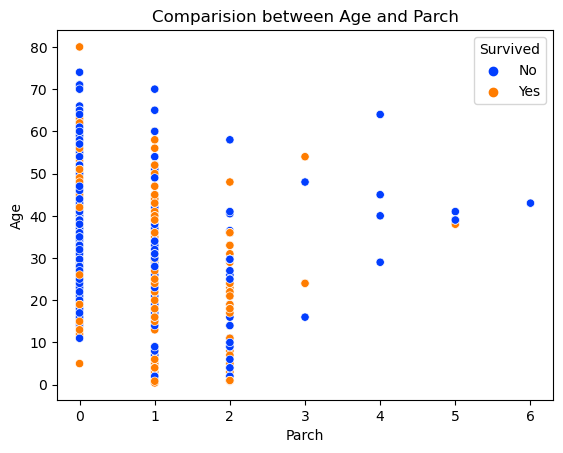

In [163]:
# Compare Age with Parch
plt.title('Comparision between Age and Parch')
sns.scatterplot(x = 'Parch', y = 'Age', data = df, hue = 'Survived', palette = 'bright')
plt.show()

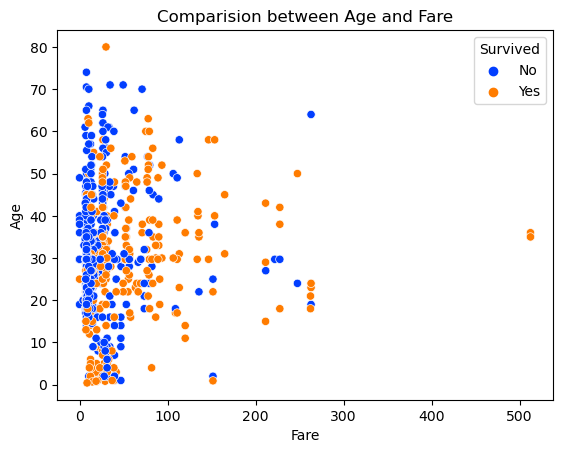

In [164]:
# Compare Age with Fare
plt.title('Comparision between Age and Fare')
sns.scatterplot(x = 'Fare', y = 'Age', data = df, hue = 'Survived', palette = 'bright')
plt.show()

There is some relationship between Age and Fare.

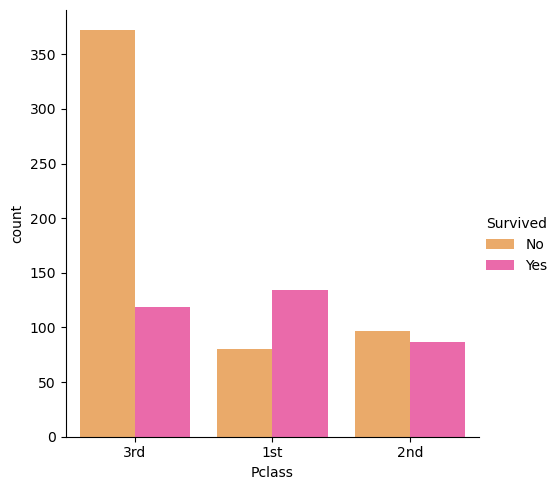

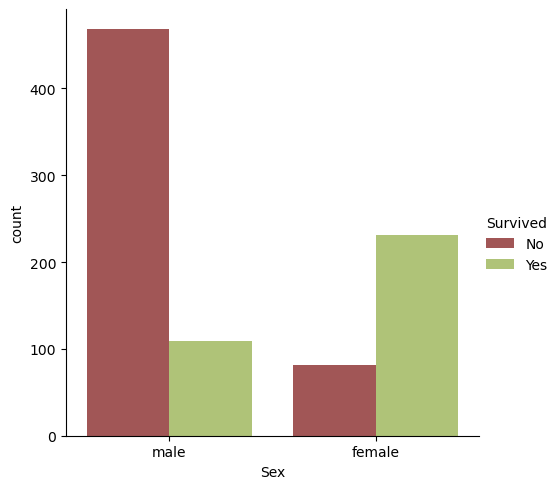

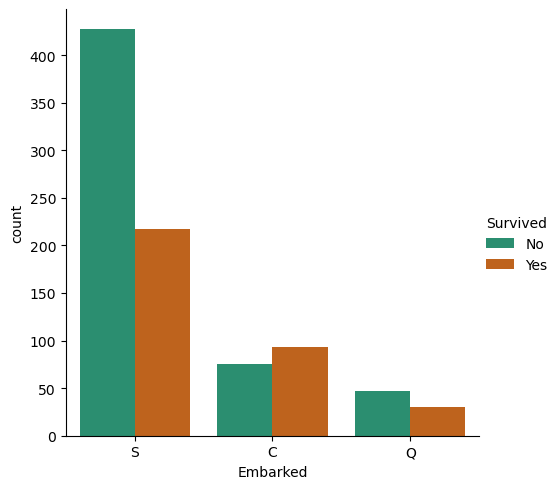

In [173]:
# Check Survived rate with Pclass
sns.catplot( x= 'Pclass', hue= 'Survived', data=df, kind = 'count', palette = 'spring_r')

# Check Survived rate with Sex
sns.catplot( x= 'Sex', hue= 'Survived', data=df, kind = 'count', palette = 'tab20b_r')

# Check Survived rate with Embarked
sns.catplot( x= 'Embarked', hue= 'Survived', data=df, kind = 'count', palette = 'Dark2')

plt.show()

##### Survived rate with Pclass : 
Survival Rate for 1st Class passengers are more, 2nd Class Passeneges have alomst same survival rate with non survival rate and for 3rd Class Survival Rate is very low.


##### Survived rate with Sex :
Comparative Survival Rates of Females Passengers were far higher than Male Passengers.

##### Survived rate with Embarked :
Ratio of Passengers survive is slightly higher in C than Non survived, for Q Survival is slightly on lower side than non survived passengers and for S Survival is almost half than non survived passengers.

###  Multivariate Analysis.

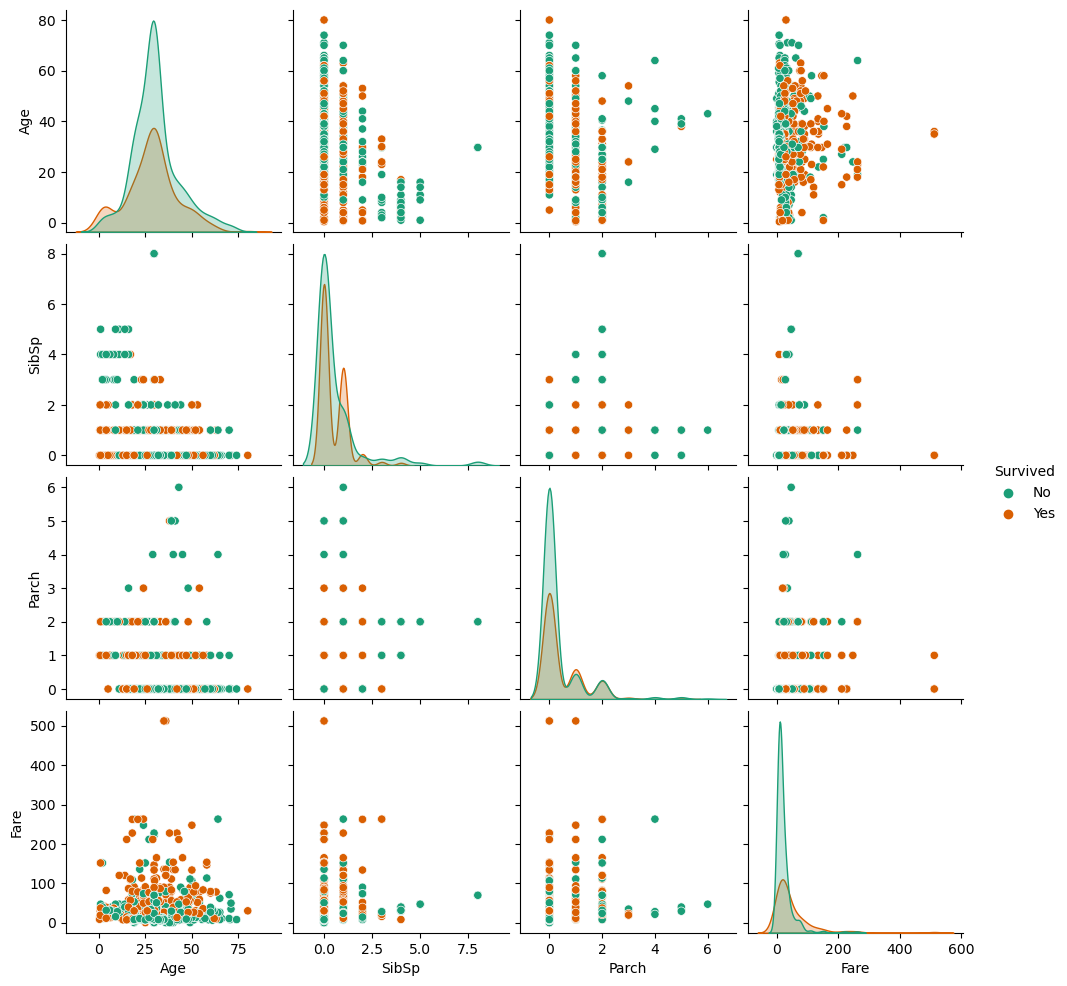

In [174]:
sns.pairplot(df, hue = 'Survived', palette = 'Dark2')

plt.show()

There are some relations between all columns.

All Columns shows Outliers, since SibSp and Parch contains Categorical Data, hence it is ignored

### Check for Outliers.

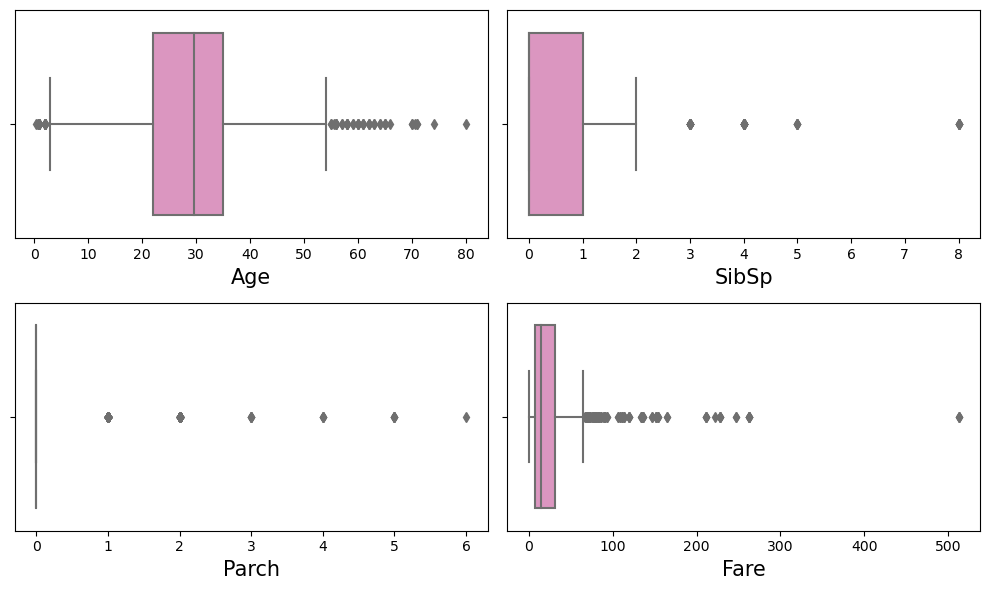

In [175]:
# lets check Outliers with help of BOX Plot.
plt.figure(figsize=(10,6), facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber <= 4 :
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = 'Set2_r')
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [198]:
df1 = df
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,3rd,male,22.000000,1,0,A/5 21171,7.2500,S
1,Yes,1st,female,38.000000,1,0,PC 17599,71.2833,C
2,Yes,3rd,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,Yes,1st,female,35.000000,1,0,113803,53.1000,S
4,No,3rd,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,No,2nd,male,27.000000,0,0,211536,13.0000,S
887,Yes,1st,female,19.000000,0,0,112053,30.0000,S
888,No,3rd,female,29.699118,1,2,W./C. 6607,23.4500,S
889,Yes,1st,male,26.000000,0,0,111369,30.0000,C


In [199]:
# Find IQR (Inter Quartile Range) to identify outliers.
q1 = df1.quantile(0.25)

q3 = df1.quantile(0.75)

iqr = q3-q1

In [200]:
q1

Age      22.0000
SibSp     0.0000
Parch     0.0000
Fare      7.8958
Name: 0.25, dtype: float64

In [201]:
q3

Age      35.0
SibSp     1.0
Parch     0.0
Fare     31.0
Name: 0.75, dtype: float64

In [202]:
ag_high = (q3.Age + (1.5 * iqr.Age))
ag_high

54.5

In [203]:
np_index = np.where(df1['Age'] > ag_high)
np_index

(array([ 11,  15,  33,  54,  93,  95, 115, 151, 169, 173, 194, 231, 251,
        267, 274, 279, 325, 365, 437, 455, 466, 482, 486, 491, 492, 544,
        554, 569, 586, 624, 625, 629, 646, 658, 671, 683, 693, 744, 771,
        849, 877], dtype=int64),)

In [204]:
df1 = df1.drop(df1.index[np_index]) # 
df1.shape

(848, 9)

In [205]:
df1.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,No,3rd,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,Yes,1st,female,38.000000,1,0,PC 17599,71.2833,C
2,2,Yes,3rd,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,Yes,1st,female,35.000000,1,0,113803,53.1000,S
4,4,No,3rd,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
843,886,No,2nd,male,27.000000,0,0,211536,13.0000,S
844,887,Yes,1st,female,19.000000,0,0,112053,30.0000,S
845,888,No,3rd,female,29.699118,1,2,W./C. 6607,23.4500,S
846,889,Yes,1st,male,26.000000,0,0,111369,30.0000,C


In [206]:
fr_high = (q3.Fare + (1.5 * iqr.Fare))
fr_high

65.6563

In [209]:
npf_index = np.where(df1['Fare'] > fr_high)
npf_index

(array([  1,  25,  29,  31,  49,  57,  67,  83,  95, 110, 112, 116, 131,
        143, 150, 169, 189, 203, 206, 212, 218, 232, 242, 243, 244, 248,
        254, 273, 274, 280, 282, 288, 289, 290, 293, 294, 301, 302, 307,
        308, 314, 316, 318, 319, 323, 350, 354, 356, 358, 361, 366, 371,
        374, 393, 416, 425, 433, 461, 463, 470, 472, 478, 479, 494, 501,
        511, 514, 518, 523, 529, 530, 552, 556, 561, 579, 595, 608, 612,
        621, 625, 630, 643, 645, 652, 660, 662, 670, 678, 692, 699, 703,
        704, 720, 724, 726, 739, 749, 752, 762, 780, 794, 805, 808, 814,
        821], dtype=int64),)

In [210]:
df1 = df1.drop(df1.index[npf_index])
df1.shape

(743, 9)

In [211]:
df1.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,No,3rd,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,Yes,3rd,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
2,3,Yes,1st,female,35.000000,1,0,113803,53.1000,S
3,4,No,3rd,male,35.000000,0,0,373450,8.0500,S
4,5,No,3rd,male,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
738,886,No,2nd,male,27.000000,0,0,211536,13.0000,S
739,887,Yes,1st,female,19.000000,0,0,112053,30.0000,S
740,888,No,3rd,female,29.699118,1,2,W./C. 6607,23.4500,S
741,889,Yes,1st,male,26.000000,0,0,111369,30.0000,C


In [219]:
df1.describe()

,Age,SibSp,Parch,Fare
count,743.000000,743.000000,743.000000,743.000000
mean,27.672284,0.454913,0.352624,17.605944
std,10.912975,0.914277,0.798932,13.542889
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,29.699118,0.000000,0.000000,12.525000
75%,32.000000,1.000000,0.000000,26.000000
max,54.000000,5.000000,6.000000,65.000000


### Check Skewness of the Data.

In [220]:
df1.skew()

Age     -0.224832
SibSp    2.722312
Parch    3.080304
Fare     1.471877
dtype: float64

Skewness is observed in SibSp, Parch and Fare. Data is Continuous for Fare and rest 02 are Categorical Data and hence it can be skipped.

#### Remove Skewness from Column.

In [223]:
# Cube Root method to remove Skewness in the Column.

df1['Fare'] = np.cbrt(df1['Fare'])

In [224]:
#Chech Skewness after removing Skewness.

df1.skew()

Age     -0.224832
SibSp    2.722312
Parch    3.080304
Fare    -0.298719
dtype: float64

##### Data Visualisation after removing Skewness from Total Charges.

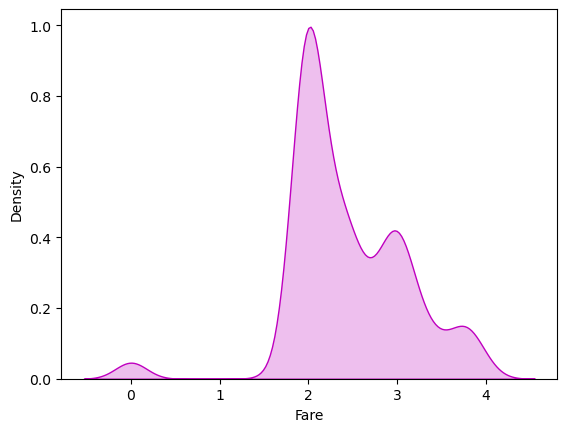

In [225]:
sns.distplot(df1['Fare'], color='m', kde_kws = {"shade":True}, hist = False)

plt.show()

The Data is ok with skewness towards Right is removed.

### Encoding Categorical Column.

In [226]:
# Using Ordinal Encoders on Categorical Columns.

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,2.0,1.0,22.000000,1,0,470.0,1.935438,2.0
2,1.0,2.0,0.0,26.000000,0,0,591.0,1.993730,2.0
3,1.0,0.0,0.0,35.000000,1,0,34.0,3.758647,2.0
4,0.0,2.0,1.0,35.000000,0,0,422.0,2.004158,2.0
5,0.0,2.0,1.0,29.699118,0,0,237.0,2.037485,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,1.0,27.000000,0,0,68.0,2.351335,2.0
887,1.0,0.0,0.0,19.000000,0,0,10.0,3.107233,2.0
888,0.0,2.0,0.0,29.699118,1,2,597.0,2.862294,2.0
889,1.0,0.0,1.0,26.000000,0,0,4.0,3.107233,0.0


In [228]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  743 non-null    float64
 1   Pclass    743 non-null    float64
 2   Sex       743 non-null    float64
 3   Age       743 non-null    float64
 4   SibSp     743 non-null    int64  
 5   Parch     743 non-null    int64  
 6   Ticket    743 non-null    float64
 7   Fare      743 non-null    float64
 8   Embarked  743 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 58.0 KB


In [229]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,0.345895,1.514132,0.676985,27.672284,0.454913,0.352624,297.547779,2.437066,1.606999
std,0.475980,0.711478,0.467943,10.912975,0.914277,0.798932,174.173118,0.663941,0.731689
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,145.500000,1.991279,2.000000
50%,0.000000,2.000000,1.000000,29.699118,0.000000,0.000000,294.000000,2.322341,2.000000
75%,1.000000,2.000000,1.000000,32.000000,1.000000,0.000000,447.500000,2.962496,2.000000
max,1.000000,2.000000,1.000000,54.000000,5.000000,6.000000,601.000000,4.020726,2.000000


### Correlation between Target Column and Independant Columns.

In [231]:
cor = df1.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.271142,-0.496078,-0.103748,-0.009020,0.097020,-0.171616,0.259959,-0.116087
Pclass,-0.271142,1.000000,0.038017,-0.281470,0.097839,0.071834,0.391910,-0.473595,0.005505
Sex,-0.496078,0.038017,1.000000,0.098066,-0.141191,-0.289726,0.054427,-0.195255,0.081399
Age,-0.103748,-0.281470,0.098066,1.000000,-0.348732,-0.207515,-0.075101,-0.000715,0.042443
SibSp,-0.009020,0.097839,-0.141191,-0.348732,1.000000,0.405566,0.040766,0.395689,0.058090
Parch,0.097020,0.071834,-0.289726,-0.207515,0.405566,1.000000,0.055965,0.362292,0.018366
Ticket,-0.171616,0.391910,0.054427,-0.075101,0.040766,0.055965,1.000000,-0.187033,0.073222
Fare,0.259959,-0.473595,-0.195255,-0.000715,0.395689,0.362292,-0.187033,1.000000,-0.044931
Embarked,-0.116087,0.005505,0.081399,0.042443,0.058090,0.018366,0.073222,-0.044931,1.000000


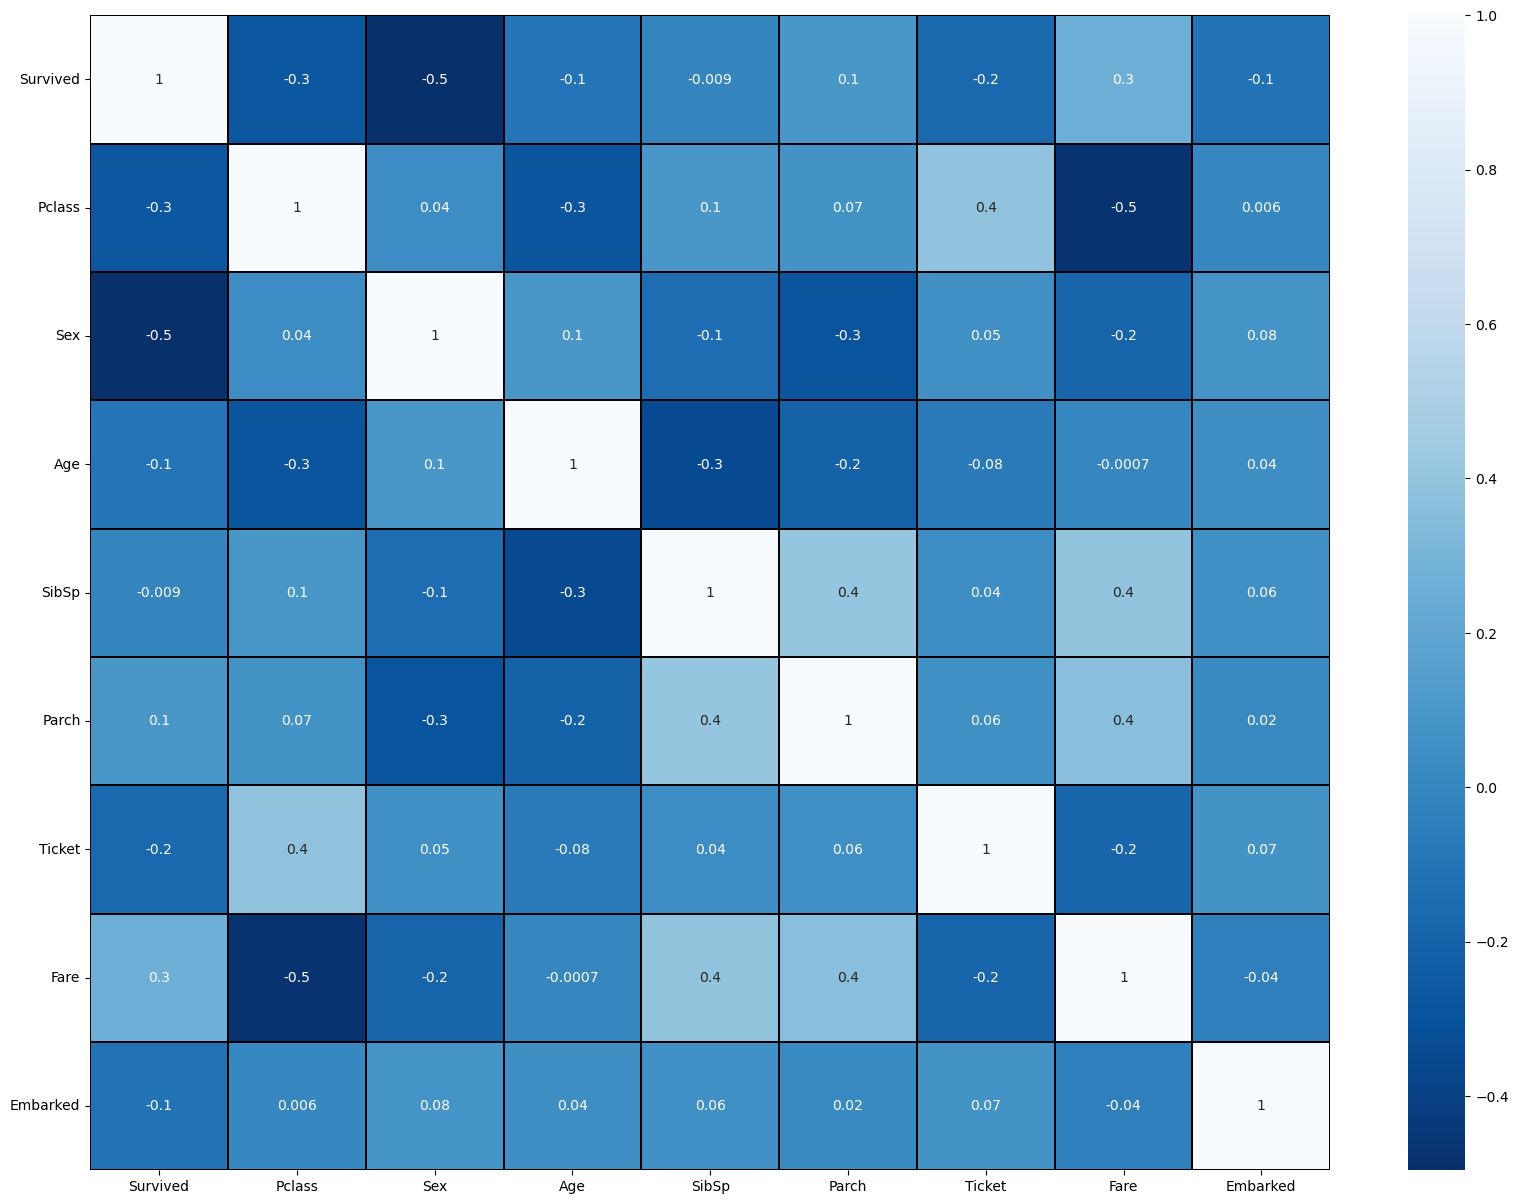

In [233]:
# Visualising the Correlation matrix using Heat-Map

plt.figure(figsize = (20, 15))
sns.heatmap(df1.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0)
plt.show()

Heatmap contains both +ve and -ve Correlation between Target Variable( Column Name 'Survived') and All Features.

1) There is not much +ve correlation between Target and Features

2) Parch and Fare have +ve Correlation with Target Variable.

3) Pclass, Age, Sex, SibSp, Ticket and Embarked have -ve Correlation

4) SibSp have very weak correlation and hence can be dropped if it is necessary.

5) After comparision between Columns Pclass with Fare and many other columns have fairly good correlation with each other.

In [234]:
cor['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.259959
Parch       0.097020
SibSp      -0.009020
Age        -0.103748
Embarked   -0.116087
Ticket     -0.171616
Pclass     -0.271142
Sex        -0.496078
Name: Survived, dtype: float64

Positive and Negative Correlation with Survived Column is available.

### Visualise Correlation between Features and label

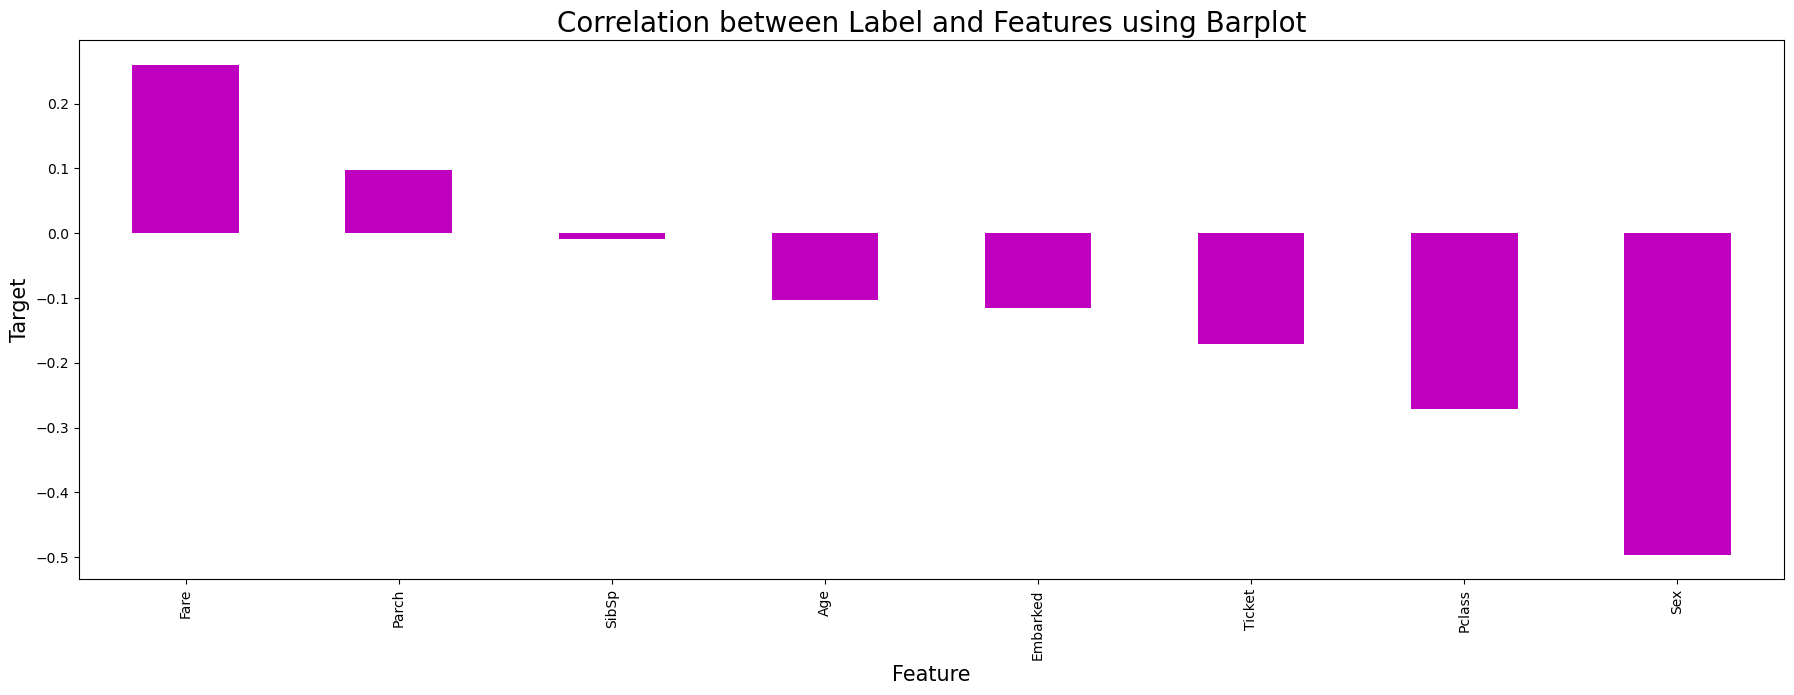

In [235]:
plt.figure(figsize = (22, 7))
df1.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar', color = 'm')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title ("Correlation between Label and Features using Barplot", fontsize = 20)
plt.show()

SibSp have Very Less Correlation with Target Variable

### Separating Features and Label

In [242]:
x = df1.drop('Survived', axis = 1)
y = df1['Survived']

#### Feature Scaling using Standard Scalarization

In [243]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.683359,0.690751,-0.520124,0.596597,-0.441667,0.990787,-0.756039,0.537477
1,0.683359,-1.447699,-0.153341,-0.497900,-0.441667,1.685966,-0.668183,0.537477
2,-2.129582,-1.447699,0.671921,0.596597,-0.441667,-1.514156,1.991849,0.537477
3,0.683359,0.690751,0.671921,-0.497900,-0.441667,0.715013,-0.652467,0.537477
4,0.683359,0.690751,0.185852,-0.497900,-0.441667,-0.347864,-0.602238,-0.830144
...,...,...,...,...,...,...,...,...
738,-0.723111,0.690751,-0.061646,-0.497900,-0.441667,-1.318817,-0.129212,0.537477
739,-2.129582,-1.447699,-0.795212,-0.497900,-0.441667,-1.652043,1.010056,0.537477
740,0.683359,-1.447699,0.185852,0.596597,2.063362,1.720437,0.640892,0.537477
741,-2.129582,0.690751,-0.153341,-0.497900,-0.441667,-1.686515,1.010056,-2.197766


To overcome issue of Biasness data is scaled using Standard Scaler Method.

### Checking Variance Inflation Factor (VIF)

In [244]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.790772,Pclass
1,1.116289,Sex
2,1.243971,Age
3,1.564083,SibSp
4,1.413313,Parch
5,1.194276,Ticket
6,1.948080,Fare
7,1.029448,Embarked


VIF Value is below Threshold Value.

In [245]:
y.value_counts()

0.0    486
1.0    257
Name: Survived, dtype: int64

The data is not balanced, use oversampling method to balance the data.

#### Oversampling the Data

In [246]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [247]:
y1.value_counts()

0.0    486
1.0    486
Name: Survived, dtype: int64

Imbalance in the data is now removed

##  Build Machine Learning Classification Model

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0

for i in range (1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict (x_test)
    acc = accuracy_score (y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy =", maxAccu, 'at random state', maxRS)

Best Accuracy = 0.8904109589041096 at random state 30


#### Creating train test split

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

### Classification Algorithms

In [251]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble  import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

#### Logistic Regression

In [252]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7802690582959642
[[130  26]
 [ 23  44]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       156
         1.0       0.63      0.66      0.64        67

    accuracy                           0.78       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.78      0.78      0.78       223



Model Accuracy is 78.02%

#### Support Vector Machine Classifier

In [253]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.820627802690583
[[135  21]
 [ 19  48]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87       156
         1.0       0.70      0.72      0.71        67

    accuracy                           0.82       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.82      0.82      0.82       223



Model Accuracy is 82.06%

#### Random Forest Classifier

In [254]:
RFC  = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8430493273542601
[[139  17]
 [ 18  49]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       156
         1.0       0.74      0.73      0.74        67

    accuracy                           0.84       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.84      0.84      0.84       223



Model Accuracy is 84.30%

#### Gradient Boosting Classifier

In [255]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.852017937219731
[[141  15]
 [ 18  49]]
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       156
         1.0       0.77      0.73      0.75        67

    accuracy                           0.85       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.85      0.85      0.85       223



Model Accuracy is 85.20%

#### AdaBoost Classifier

In [256]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8161434977578476
[[136  20]
 [ 21  46]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       156
         1.0       0.70      0.69      0.69        67

    accuracy                           0.82       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.82      0.82      0.82       223



Model Accuracy is 81.61%

#### Bagging Classifier

In [257]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8430493273542601
[[140  16]
 [ 19  48]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       156
         1.0       0.75      0.72      0.73        67

    accuracy                           0.84       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.84      0.84      0.84       223



Model Accuracy is 84.30%

#### ExtraTrees Classifier

In [258]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8430493273542601
[[137  19]
 [ 16  51]]
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       156
         1.0       0.73      0.76      0.74        67

    accuracy                           0.84       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.85      0.84      0.84       223



Model Accuracy is 84.30%

### Cross Validation Score

In [259]:
from sklearn.model_selection import cross_val_score
# Cross Validation Score for Random Forest
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())
print(accuracy_score(y_test, predRFC))
print('Difference between Accuracy Score and Cross Validation Score is', accuracy_score(y_test, predRFC) - score.mean())

[0.77948718 0.82564103 0.89690722 0.8814433  0.88659794]
0.8540153317472905
0.8430493273542601
Difference between Accuracy Score and Cross Validation Score is -0.010966004393030415


In [260]:
# Cross Validation Score for Linear Regression
score = cross_val_score(LR, x1, y1)
print(score)
print(score.mean())
print(accuracy_score(y_test, predLR))
print('Difference between Accuracy Score and Cross Validation Score is', accuracy_score(y_test, predLR) - score.mean())

[0.73846154 0.75897436 0.77319588 0.77319588 0.77319588]
0.7634047052603753
0.7802690582959642
Difference between Accuracy Score and Cross Validation Score is 0.016864353035588864


In [261]:
# Cross Validation Score for Gradient Boosting
score = cross_val_score(GB, x1, y1)
print(score)
print(score.mean())
print(accuracy_score(y_test, predGB))
print('Difference between Accuracy Score and Cross Validation Score is', accuracy_score(y_test, predGB) - score.mean())

[0.8        0.83076923 0.86597938 0.83505155 0.86597938]
0.8395559080095163
0.852017937219731
Difference between Accuracy Score and Cross Validation Score is 0.012462029210214665


In [262]:
# Cross Validation Score for Support Vector Machine
score = cross_val_score(svc, x1, y1)
print(score)
print(score.mean())
print(accuracy_score(y_test, predsvc))
print('Difference between Accuracy Score and Cross Validation Score is', accuracy_score(y_test, predsvc) - score.mean())

[0.76923077 0.77948718 0.81958763 0.81443299 0.82474227]
0.8014961670631774
0.820627802690583
Difference between Accuracy Score and Cross Validation Score is 0.019131635627405608


In [263]:
# Cross Validation Score for AdaBoosting
score = cross_val_score(ABC, x1, y1)
print(score)
print(score.mean())
print(accuracy_score(y_test, predABC))
print('Difference between Accuracy Score and Cross Validation Score is', accuracy_score(y_test, predABC) - score.mean())

[0.77435897 0.77435897 0.80927835 0.79381443 0.81958763]
0.7942796722178166
0.8161434977578476
Difference between Accuracy Score and Cross Validation Score is 0.021863825540030968


In [264]:
# Cross Validation Score for Bagging
score = cross_val_score(BC, x1, y1)
print(score)
print(score.mean())
print(accuracy_score(y_test, predBC))
print('Difference between Accuracy Score and Cross Validation Score is', accuracy_score(y_test, predBC) - score.mean())

[0.79487179 0.83589744 0.8556701  0.87628866 0.87628866]
0.8478033306899286
0.8430493273542601
Difference between Accuracy Score and Cross Validation Score is -0.004754003335668555


In [265]:
# Cross Validation Score for ExtraTrees
score = cross_val_score(ET, x1, y1)
print(score)
print(score.mean())
print(accuracy_score(y_test, predET))
print('Difference between Accuracy Score and Cross Validation Score is', accuracy_score(y_test, predET) - score.mean())

[0.75897436 0.82564103 0.8556701  0.87628866 0.84536082]
0.83238699444885
0.8430493273542601
Difference between Accuracy Score and Cross Validation Score is 0.010662332905410077


Bagging Classifier is the Best Model.

### Hyper Parameter Tunning

In [266]:
from sklearn.model_selection import GridSearchCV

In [271]:
parameters = {'n_estimators' : [10, 20, 30],
              'max_samples' : [1,2,3,4,5],
              'max_features' : [1,2,3,4,5]}

In [272]:
GCV = GridSearchCV(BaggingClassifier(), parameters, cv=5)

In [273]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30]})

In [274]:
GCV.best_params_

{'max_features': 3, 'max_samples': 4, 'n_estimators': 30}

In [275]:
Final_model = BaggingClassifier (max_features = 3, max_samples = 4, n_estimators = 30)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

76.68161434977578


In [276]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

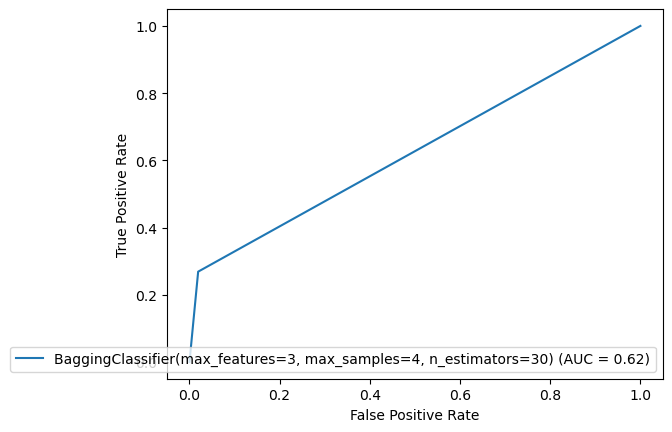

In [277]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()